In [34]:
import numpy as np
from networkx.algorithms.community import LFR_benchmark_graph

In [35]:
n = 1000
tau1 = 2
tau2 = 1.05
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=50, seed=11, max_iters=100)

In [36]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
print(communities)

{frozenset({643, 772, 900, 7, 903, 10, 11, 524, 782, 278, 24, 282, 539, 542, 31, 32, 30, 807, 39, 554, 171, 940, 47, 49, 564, 822, 56, 952, 316, 76, 77, 80, 507, 854, 470, 215, 727, 730, 859, 220, 738, 355, 226, 228, 741, 359, 617, 491, 877, 366, 749, 240, 241, 760, 763, 503, 504, 761, 635, 252, 253, 511}), frozenset({4, 522, 18, 532, 21, 536, 25, 538, 287, 806, 41, 557, 48, 563, 317, 321, 322, 73, 79, 596, 88, 606, 96, 97, 614, 105, 116, 632, 889, 634, 124, 126, 638, 642, 645, 134, 902, 911, 409, 922, 411, 413, 672, 931, 421, 939, 941, 430, 943, 179, 438, 440, 185, 955, 443, 196, 965, 968, 459, 717, 719, 975, 981, 472, 475, 476, 990, 485, 744, 489, 236, 509, 767}), frozenset({512, 1, 2, 0, 774, 6, 521, 13, 273, 274, 785, 281, 286, 802, 37, 167, 45, 301, 560, 311, 568, 58, 571, 61, 573, 447, 832, 576, 703, 324, 837, 582, 198, 329, 972, 78, 593, 721, 978, 85, 94, 222, 479, 994, 996, 869, 486, 230, 742, 747, 237, 111, 367, 883, 246, 380, 249, 636}), frozenset({896, 641, 897, 644, 132, 51

In [37]:
len(communities)

11

In [38]:
import networkx as nx

In [39]:
g_array = nx.to_numpy_array(G)

In [40]:
np.set_printoptions(threshold=100)

In [41]:
g_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
np.random.rand()

0.17525305843502648

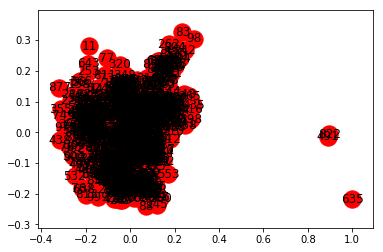

In [43]:
nx.draw_networkx(G)

In [44]:
G = np.zeros((500, 500))

In [14]:
for i in range(500):
    for j in range(i, 500):
        if j <= i+10:
            if np.random.rand() < 3/10:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()
        else:
            if np.random.rand() < 3/490:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()

In [15]:
G=nx.from_numpy_matrix(G)

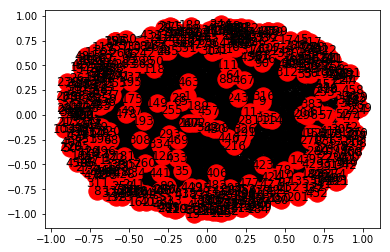

In [16]:
nx.draw_networkx(G)

In [17]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j <= i+(N/community_number):
                if np.random.rand() < average_degree*(1-mu)/(N/community_number):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [18]:
G_array = make_modular_network(50, 5, 25, 0.1)

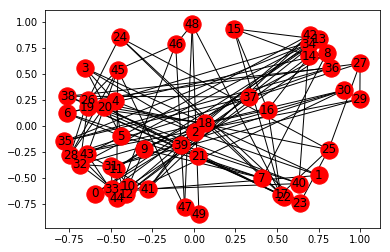

In [19]:
G=nx.from_numpy_matrix(G_array)
nx.draw_networkx(G)

In [20]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(1-(mu*0.5))-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size*((i//size)+2):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(mu*0.5)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(mu)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                    
    return G

In [64]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    size = N/community_number
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < (average_degree*(mu)-k_out_prev)/(N-(size*((i//size)+1))+1):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [65]:
G_array = make_modular_network(200, 20, 4, 0.1)
G=nx.from_numpy_matrix(G_array)

In [66]:
G.degree()

DegreeView({0: 25, 1: 25, 2: 21, 3: 25, 4: 19, 5: 18, 6: 21, 7: 14, 8: 20, 9: 15, 10: 16, 11: 19, 12: 25, 13: 24, 14: 21, 15: 20, 16: 19, 17: 18, 18: 24, 19: 19, 20: 21, 21: 23, 22: 23, 23: 21, 24: 17, 25: 22, 26: 17, 27: 18, 28: 23, 29: 19, 30: 18, 31: 22, 32: 20, 33: 18, 34: 21, 35: 26, 36: 18, 37: 16, 38: 21, 39: 19, 40: 21, 41: 20, 42: 19, 43: 20, 44: 15, 45: 21, 46: 20, 47: 20, 48: 20, 49: 22, 50: 24, 51: 21, 52: 24, 53: 21, 54: 16, 55: 19, 56: 18, 57: 23, 58: 18, 59: 17, 60: 23, 61: 19, 62: 23, 63: 24, 64: 15, 65: 18, 66: 19, 67: 23, 68: 27, 69: 19, 70: 20, 71: 21, 72: 18, 73: 18, 74: 22, 75: 22, 76: 23, 77: 15, 78: 23, 79: 18, 80: 20, 81: 25, 82: 20, 83: 18, 84: 16, 85: 20, 86: 23, 87: 21, 88: 18, 89: 21, 90: 19, 91: 18, 92: 19, 93: 24, 94: 20, 95: 20, 96: 17, 97: 20, 98: 18, 99: 22, 100: 17, 101: 25, 102: 17, 103: 17, 104: 17, 105: 19, 106: 20, 107: 23, 108: 19, 109: 14, 110: 19, 111: 19, 112: 17, 113: 20, 114: 25, 115: 21, 116: 17, 117: 23, 118: 20, 119: 20, 120: 22, 121: 28, 

In [67]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [68]:
print(degree_sequence)

[28, 28, 27, 27, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13]


In [69]:
np.mean(degree_sequence)

20.2

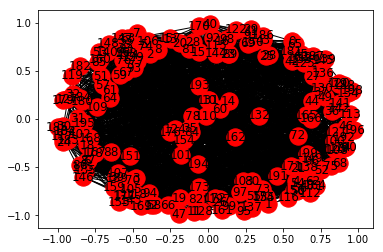

In [70]:
nx.draw_networkx(G)

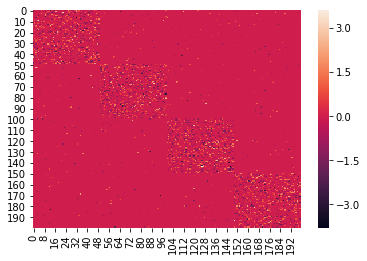

In [71]:
import seaborn as sns
sns.heatmap(G_array)

In [59]:
G_array = make_modular_network(128, 16, 4, 0.1)
G=nx.from_numpy_matrix(G_array)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[23, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 11]
16.203125


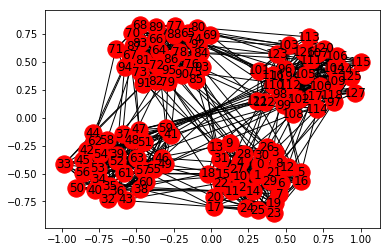

In [62]:
nx.draw_networkx(G)

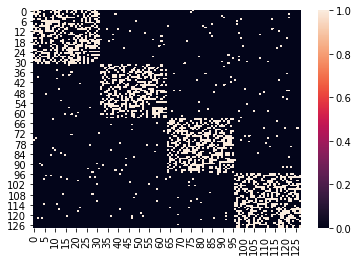

In [63]:
import seaborn as sns
sns.heatmap(G_array)